In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [6]:
bias = 100

X, y, coef = make_regression(n_features=1, bias=bias, coef=True, noise=10, random_state=42)

In [7]:
coef, bias

(array(41.74110031), 100)

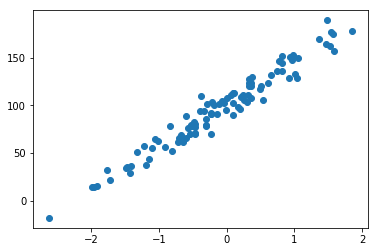

In [8]:
plt.scatter(X, y)

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

In [52]:
class CustomLinearRegression:
    
    def __init__(self, lr=.01):
        self.__lr = lr
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        
        for k in range(20):
            self.gradient_decend()
            errors.append(self.error())
            
        return errors
            
    def gradient_decend(self):
        delta_coef, delta_bias = self.gradient()
        
        self.coef_ += delta_coef
        self.intercept_ += delta_bias
        
#         print(self.coef_, self.intercept_)
        
    def gradient(self):
        yh = self.hypo(self.__X)
        
        diff = (yh - self.__y.reshape(-1, 1))
        
        del_err_coef = (2 * (diff) * self.__X).mean()
        del_err_inter = (2 * diff).mean()
        
        return -del_err_coef*self.__lr, -del_err_inter*self.__lr
        
    def hypo(self, X):
        return (X * self.coef_ + self.intercept_)
    
    def error(self):
        yh = self.hypo(self.__X)
        diff = (yh - self.__y.reshape(-1, 1))
        return (diff ** 2).mean()
        
    

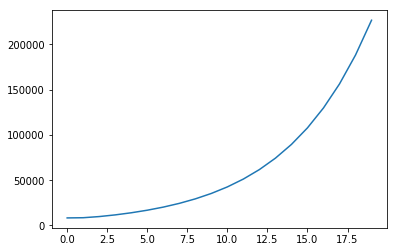

In [64]:
model = CustomLinearRegression(lr=1)
errs = model.fit(X, y)

plt.figure()
plt.plot(errs)

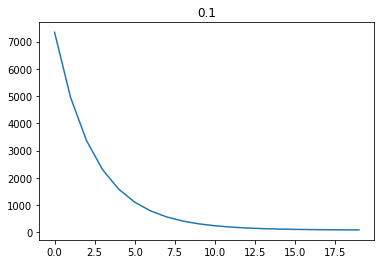

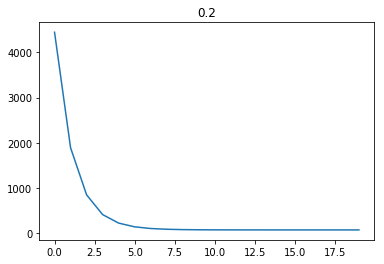

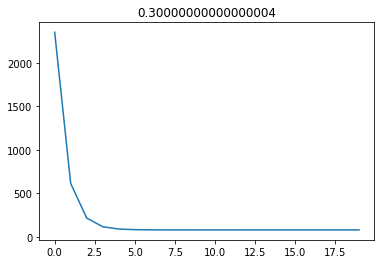

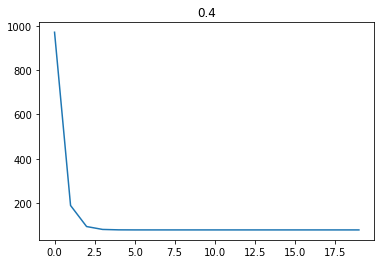

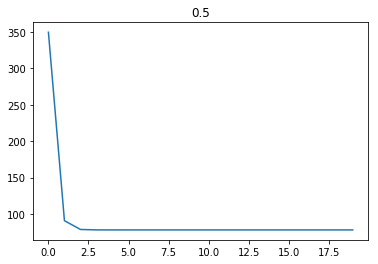

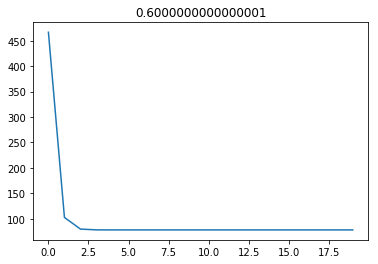

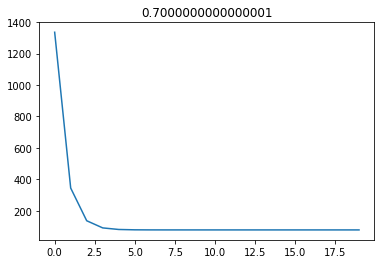

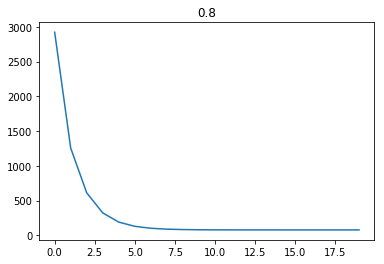

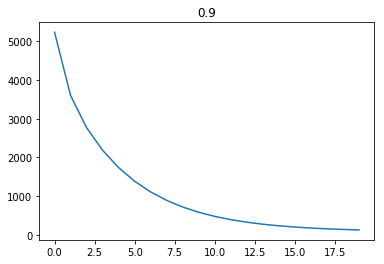

In [62]:
for i in range(1, 10):
    model = CustomLinearRegression(lr=.1 * i)
    errs = model.fit(X, y)

    plt.figure()
    plt.title(str(.1 * i))
    plt.plot(errs)